In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
b = 1 # kuhn length
position_number = 200
current_r = np.array([0, 0], dtype=float)
x_pos = np.zeros((position_number), dtype=float)
y_pos = np.zeros((position_number), dtype=float)
for i in range(position_number):
    phi = np.random.uniform(0, 360) * np.pi / 180
    if i == 0:
        x_pos[i] = 0
        y_pos[i] = 0
    else:
        x_pos[i] = x_pos[i-1] + b * np.cos(phi)
        y_pos[i] = y_pos[i-1] + b * np.sin(phi)

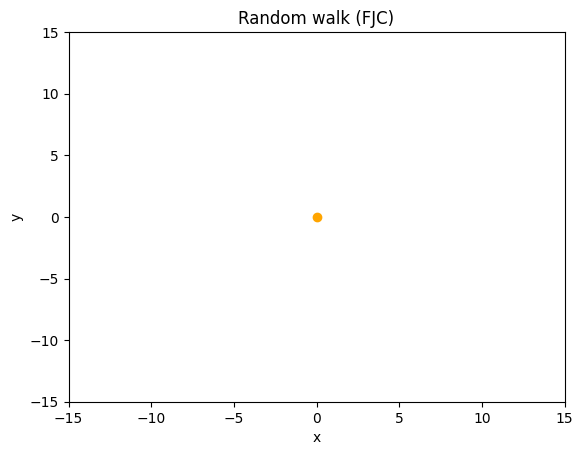

In [3]:
fig, ax = plt.subplots()

ax.scatter(0, 0, color="orange")
scat = ax.scatter(x_pos[0], y_pos[0], marker=".", s=0.4, color="red")
line, = ax.plot(x_pos[0], y_pos[0], linewidth=0.4, color="black")
ax.set_title("Random walk (FJC)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set(xlim=[-15, 15], ylim=[-15, 15])

def update(frame):
    # print(frame)
    x = x_pos[:frame]
    y = y_pos[:frame]
    data = np.stack([x, y]).T
    scat.set_offsets(data)

    line.set_xdata(x)
    line.set_ydata(y)
    return (scat, line)

ani = animation.FuncAnimation(fig=fig, func=update, frames=position_number, interval=100)
HTML(ani.to_html5_video())